In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV into a pandas DataFrame
df = pd.read_csv('all_countries_data.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

         Updated  Country Year-Week  Source  New Cases  Number Sequenced  \
0  1712154414221  Ireland   2020-01  GISAID          0                 0   
1  1712154414221  Ireland   2020-01  GISAID          0                 0   
2  1712154414221  Ireland   2020-01  GISAID          0                 0   
3  1712154414221  Ireland   2020-01  GISAID          0                 0   
4  1712154414221  Ireland   2020-01  GISAID          0                 0   

   Percent Sequenced  validDenominator             Variant  \
0                  0              True               Other   
1                  0              True        XBB.1.5-like   
2                  0              True  XBB.1.5-like+F456L   
3                  0              True             B.1.351   
4                  0              True           B.1.617.2   

   Detections of Variant  Number Sequenced of Known Variant  Percent Variant  
0                      0                                  0              0.0  
1           

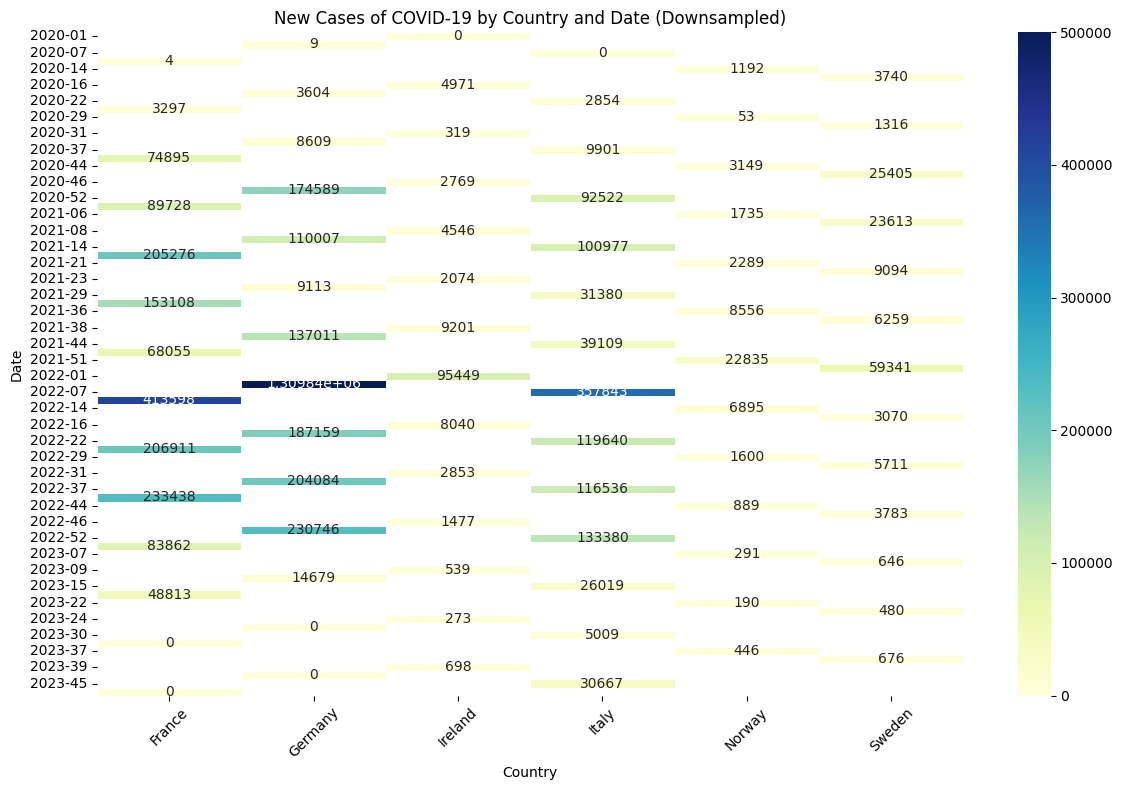

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('all_countries_data.csv')

# Drop duplicate entries based on Country and Date
df_cleaned = df.drop_duplicates(subset=['Country', 'Year-Week'])

# Downsample the DataFrame by taking every 15th row
df_downsampled = df_cleaned.iloc[::15]

# Pivot the DataFrame to create a matrix suitable for heatmap
heatmap_data = df_downsampled.pivot(index='Country', columns='Year-Week', values='New Cases')

# Transpose the heatmap data to flip X and Y axis
heatmap_data_transposed = heatmap_data.transpose()

# Create the heatmap with manual color scale limits
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_transposed, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, vmin=0, vmax=500000)
plt.title('New Cases of COVID-19 by Country and Date (Downsampled)')
plt.xlabel('Country')
plt.ylabel('Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

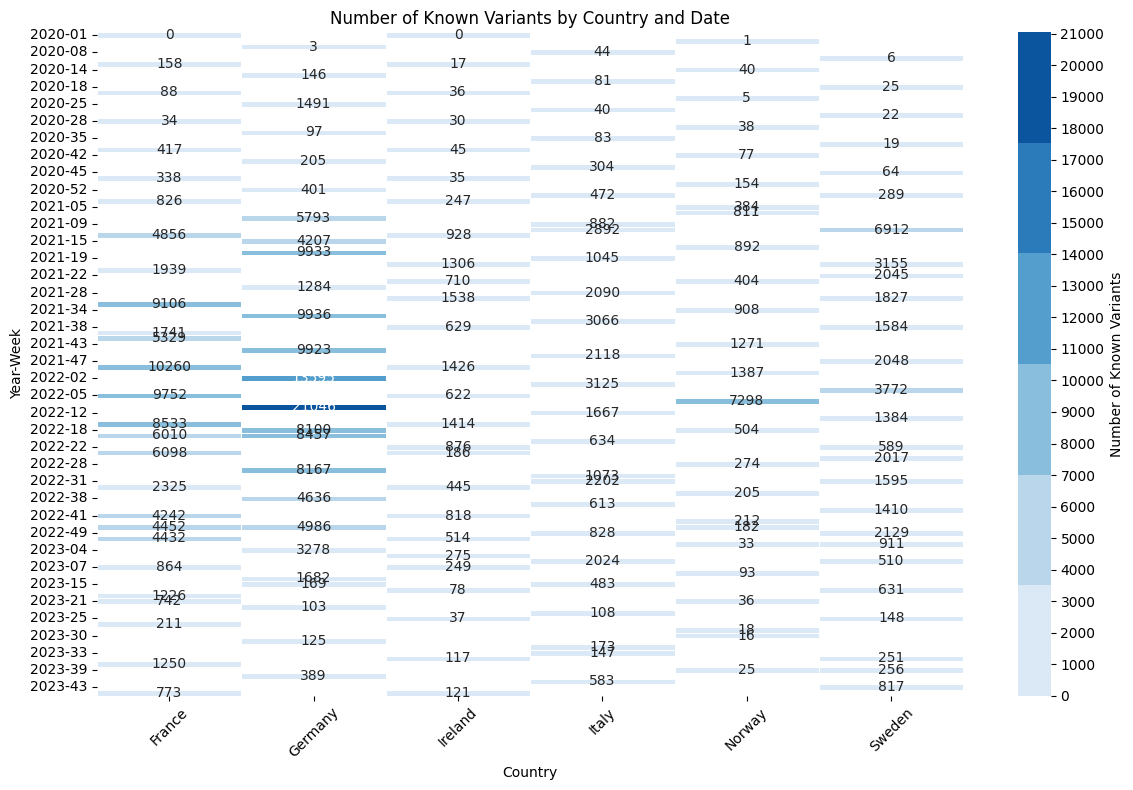

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('all_countries_data.csv')

# Downsample for better readability
df_downsampled = df.iloc[::200]

# Aggregate the values for duplicate entries
df_agg = df_downsampled.groupby(['Country', 'Year-Week'])['Number Sequenced of Known Variant'].sum().reset_index()

# Create a pivot table to reshape the data for heatmap
heatmap_data = df_agg.pivot(index='Year-Week', columns='Country', values='Number Sequenced of Known Variant')

# Set the color map and color bar settings
cmap = sns.color_palette("Blues")
vmin = 0  # Minimum value for color bar
vmax = int(heatmap_data.max().max())  # Convert to integer
cbar_ticks = range(0, vmax + 1000, 1000)  # Define color bar ticks with increments of 1000

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt='g', linewidths=.5, vmin=vmin, vmax=vmax, cbar_kws={'label': 'Number of Known Variants', 'ticks': cbar_ticks})
plt.title('Number of Known Variants by Country and Date')
plt.xlabel('Country')
plt.ylabel('Year-Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

